<a href="https://colab.research.google.com/github/durjoy6405/Data-Analysis-Using-Pyspark/blob/main/spark_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt autoremove
!apt-get update
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-460
0 upgraded, 0 newly installed, 1 to remove and 20 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 155676 files and directories currently installed.)
Removing libnvidia-common-460 (460.106.00-0ubuntu1) ...
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1L6pCQkldvdBoaEhRFzL0VnrggEFvqON4'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Bombing_Operations.json.gz')

id='14dyBmcTBA32uXPxDbqr0bFDIzGxMTWwl'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Aircraft_Glossary.json.gz')

In [ ]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2022-08-22 13:24:52--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  11.8MB/s    in 1.1s    

2022-08-22 13:24:53 (11.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [ ]:
Bombing_Operations = spark.read.json("Bombing_Operations.json.gz")
Aircraft_Glossary = spark.read.json("Aircraft_Glossary.json.gz")

In [ ]:
Bombing_Operations.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)



In [ ]:
Aircraft_Glossary.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- AirCraftName: string (nullable = true)
 |-- AirCraftType: string (nullable = true)



In [ ]:
Bombing_Operations.take(5)

[Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1971-06-05', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='TAN SON NHUT', TargetCountry='CAMBODIA', TimeOnTarget=1005.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1972-12-26', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='NAKHON PHANOM', TargetCountry='SOUTH VIETNAM', TimeOnTarget=530.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='RF-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1973-07-28', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='UDORN AB', TargetCountry='LAOS', TimeOnTarget=730.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='A-1', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1970-02-02', OperationSupported=None, PeriodOfDay='N', TakeoffLocation='NAKHON PHANOM', TargetCountry='LAOS', TimeOnTarget=1415.0, WeaponType='BLU

In [ ]:
Bombing_Operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              null|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                null|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              null|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                null|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              null|          D|       UDORN AB|         LAOS|       730.0|                null|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

In [ ]:
Aircraft_Glossary.show()

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
|     A-6|Grumman A-6 Intruder|     Attack Aircraft|
|     A-7|  LTV A-7 Corsair II|     Attack Aircraft|
|  AC-119|Fairchild AC-119 ...|Military Transpor...|
|  AC-123|Fairchild C-123 P...|Military Transpor...|
|  AC-130|Lockheed AC-130 S...|Fixed wing ground...|
|   AC-47|Douglas AC-47 Spooky|Ground attack air...|
|    AH-1| Bell AH-1 HueyCobra|          Helicopter|
|     B-1| Rockwell B-1 Lancer|Heavy strategic b...|
|    B-52| B-52 Stratofortress|    Strategic bomber|
|    B-57|Martin B-57 Canberra|     Tactical Bomber|
|    B-66|Douglas B-66 Dest...|        Light B

In [ ]:
Aircraft_Glossary.select("Aircraft","AircraftName").show()

+--------+--------------------+
|Aircraft|        AircraftName|
+--------+--------------------+
|     A-1|Douglas A-1 Skyra...|
|    A-26|Douglas A-26 Invader|
|    A-37|Cessna A-37 Drago...|
|     A-4|McDonnell Douglas...|
|     A-5|North American A-...|
|     A-6|Grumman A-6 Intruder|
|     A-7|  LTV A-7 Corsair II|
|  AC-119|Fairchild AC-119 ...|
|  AC-123|Fairchild C-123 P...|
|  AC-130|Lockheed AC-130 S...|
|   AC-47|Douglas AC-47 Spooky|
|    AH-1| Bell AH-1 HueyCobra|
|     B-1| Rockwell B-1 Lancer|
|    B-52| B-52 Stratofortress|
|    B-57|Martin B-57 Canberra|
|    B-66|Douglas B-66 Dest...|
|     C-1| Grumman C-1A Trader|
|   C-117|     C-117D Skytrain|
|   C-119|Fairchild C-119 F...|
|   C-123|Fairchild C-123 P...|
+--------+--------------------+
only showing top 20 rows



In [ ]:
Bombing_Operations.where(Bombing_Operations.ContryFlyingMission=="UNITED STATES OF AMERICA").show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              null|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                null|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              null|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                null|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              null|          D|       UDORN AB|         LAOS|       730.0|                null|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

In [ ]:
Bombing_Operations.where(Bombing_Operations.ContryFlyingMission=="UNITED STATES OF AMERICA").select("Aircraft","MissionDate").show()

+--------+-----------+
|Aircraft|MissionDate|
+--------+-----------+
|   EC-47| 1971-06-05|
|   EC-47| 1972-12-26|
|    RF-4| 1973-07-28|
|     A-1| 1970-02-02|
|     F-4| 1970-11-25|
|     A-4| 1972-03-08|
|     F-4| 1971-12-27|
|     A-7| 1972-05-24|
|   EC-47| 1972-09-12|
|   CH-53| 1974-06-13|
|   CH-53| 1974-12-19|
|     C-7| 1970-05-08|
|     A-6| 1971-05-12|
|   EB-66| 1971-12-03|
|     A-6| 1972-08-18|
|     A-7| 1972-10-15|
|     F-4| 1972-11-09|
|   C-123| 1970-02-23|
|     F-4| 1972-04-26|
|     A-7| 1972-08-24|
+--------+-----------+
only showing top 20 rows



In [ ]:
Bombing_Operations.where(Bombing_Operations.ContryFlyingMission=="UNITED STATES OF AMERICA").select("Aircraft","MissionDate").collect()

[Row(Aircraft='EC-47', MissionDate='1971-06-05'),
 Row(Aircraft='EC-47', MissionDate='1972-12-26'),
 Row(Aircraft='RF-4', MissionDate='1973-07-28'),
 Row(Aircraft='A-1', MissionDate='1970-02-02'),
 Row(Aircraft='F-4', MissionDate='1970-11-25'),
 Row(Aircraft='A-4', MissionDate='1972-03-08'),
 Row(Aircraft='F-4', MissionDate='1971-12-27'),
 Row(Aircraft='A-7', MissionDate='1972-05-24'),
 Row(Aircraft='EC-47', MissionDate='1972-09-12'),
 Row(Aircraft='CH-53', MissionDate='1974-06-13'),
 Row(Aircraft='CH-53', MissionDate='1974-12-19'),
 Row(Aircraft='C-7', MissionDate='1970-05-08'),
 Row(Aircraft='A-6', MissionDate='1971-05-12'),
 Row(Aircraft='EB-66', MissionDate='1971-12-03'),
 Row(Aircraft='A-6', MissionDate='1972-08-18'),
 Row(Aircraft='A-7', MissionDate='1972-10-15'),
 Row(Aircraft='F-4', MissionDate='1972-11-09'),
 Row(Aircraft='C-123', MissionDate='1970-02-23'),
 Row(Aircraft='F-4', MissionDate='1972-04-26'),
 Row(Aircraft='A-7', MissionDate='1972-08-24'),
 Row(Aircraft='AC-130', M

In [ ]:
Aircraft_Glossary.count()

104

In [ ]:
Bombing_Operations.count()

4400775

In [ ]:
Bombing_Operations.where("TargetCountry = 'LAOS' AND TimeOnTarget > 1000").select("Aircraft","MissionDate").show()

+--------+-----------+
|Aircraft|MissionDate|
+--------+-----------+
|     A-1| 1970-02-02|
|     A-4| 1972-03-08|
|     A-6| 1971-05-12|
|   EB-66| 1971-12-03|
|   F-105| 1970-10-02|
|     A-7| 1973-02-24|
|    B-52| 1972-02-21|
|   C-130| 1970-01-16|
|    B-57| 1971-06-24|
|  AC-119| 1971-11-05|
|  AC-130| 1972-03-01|
|  AC-130| 1971-04-21|
|     F-4| 1970-11-16|
|   AC-47| 1973-01-18|
|  AC-130| 1971-04-26|
|   AC-47| 1972-01-13|
|     F-4| 1970-02-03|
|  AC-130| 1970-01-18|
|   QU-22| 1971-06-29|
|     F-4| 1970-04-02|
+--------+-----------+
only showing top 20 rows



In [ ]:
missions_count = Bombing_Operations.groupBy("ContryFlyingMission").agg(count("*").alias("NumOfMissions")).sort(asc("NumOfMissions"))

In [ ]:
missions_count.show()

+--------------------+-------------+
| ContryFlyingMission|NumOfMissions|
+--------------------+-------------+
|           AUSTRALIA|        12519|
|       KOREA (SOUTH)|        24469|
|                LAOS|        32777|
|     VIETNAM (SOUTH)|       622013|
|UNITED STATES OF ...|      3708997|
+--------------------+-------------+



In [ ]:
Bombing_Operations.createOrReplaceTempView("Bombing_Operations")

query = """ SELECT ContryFlyingMission, count(*) AS NumOfMissions FROM Bombing_Operations GROUP BY ContryFlyingMission ORDER BY NumOfMissions desc """

missions_count1 = spark.sql(query)

In [ ]:
missions_count1.show()

+--------------------+-------------+
| ContryFlyingMission|NumOfMissions|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



In [ ]:
missions_count1_pd = missions_count1.toPandas()

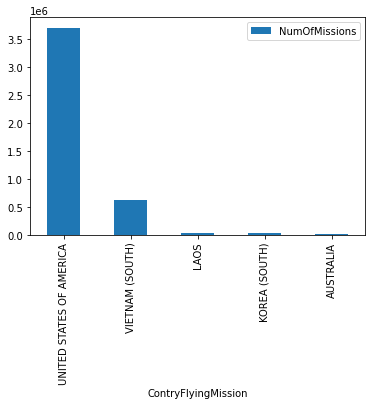

In [ ]:
plt1 = missions_count1_pd.plot (kind = "bar", x = "ContryFlyingMission", y = "NumOfMissions")

In [ ]:
missions_count_Q1 = Bombing_Operations.groupBy("ContryFlyingMission","MissionDate").agg(count("*").alias("NumOfMissions")).sort(asc("MissionDate"))

In [ ]:
missions_count_Q1.show()

+--------------------+-----------+-------------+
| ContryFlyingMission|MissionDate|NumOfMissions|
+--------------------+-----------+-------------+
|UNITED STATES OF ...| 1965-10-01|          447|
|UNITED STATES OF ...| 1965-10-02|          652|
|UNITED STATES OF ...| 1965-10-03|          608|
|UNITED STATES OF ...| 1965-10-04|          532|
|     VIETNAM (SOUTH)| 1965-10-05|           72|
|UNITED STATES OF ...| 1965-10-05|          697|
|UNITED STATES OF ...| 1965-10-06|          689|
|     VIETNAM (SOUTH)| 1965-10-06|           49|
|     VIETNAM (SOUTH)| 1965-10-07|           50|
|UNITED STATES OF ...| 1965-10-07|          605|
|     VIETNAM (SOUTH)| 1965-10-08|           64|
|UNITED STATES OF ...| 1965-10-08|          700|
|     VIETNAM (SOUTH)| 1965-10-09|           69|
|UNITED STATES OF ...| 1965-10-09|          677|
|     VIETNAM (SOUTH)| 1965-10-10|           59|
|UNITED STATES OF ...| 1965-10-10|          789|
|     VIETNAM (SOUTH)| 1965-10-11|           48|
|UNITED STATES OF ..

In [ ]:
missions_count_Q2 = Bombing_Operations.where("TargetCountry = 'NORTH VIETNAM' AND ContryFlyingMission = 'UNITED STATES OF AMERICA' AND MissionDate = '1966-06-29'").groupby("TakeoffLocation").agg(count("*").alias("NumOfMissions"))

In [ ]:
missions_count_Q2.show()

+----------------+-------------+
| TakeoffLocation|NumOfMissions|
+----------------+-------------+
|    TAN SON NHUT|           26|
|          DANANG|           29|
|        UDORN AB|           44|
|HANCOCK (CVA-19)|           10|
|   CONSTELLATION|           87|
|          TAKHLI|           56|
|         CUBI PT|            1|
|          RANGER|           35|
|           KORAT|           55|
|         UBON AB|           44|
|    CAM RANH BAY|            2|
+----------------+-------------+



In [ ]:
data_customer=spark.read.csv('CC GENERAL.csv', header = True, inferSchema=True)
data_customer.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



In [ ]:
data_customer=data_customer.na.drop()

In [ ]:
from pyspark.ml.feature import VectorAssembler
print(data_customer.columns)


['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [ ]:
assemble = VectorAssembler (inputCols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], outputCol='features')
assembled_data = assemble.transform(data_customer)
assembled_data.show(5)


+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
| C10001|  40.900749|       

In [ ]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale= scale.fit(assembled_data)
data_scale_output= data_scale.transform(assembled_data)
data_scale_output.show(2)

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|        standardized|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score = []
evaluator=ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', metricName='silhouette',distanceMeasure='squaredEuclidean')

for i in range(2,11):
  KMeans_algo=KMeans(featuresCol='standardized',k=i)

  KMeans_fit=KMeans_algo.fit(data_scale_output)

  output=KMeans_fit.transform(data_scale_output)

  score = evaluator.evaluate(output)

  silhouette_score.append(score)
  print("Silhouette Score for k = ",i,"-->",score)


print(silhouette_score)



Silhouette Score for k =  2 --> 0.45629801695828
Silhouette Score for k =  3 --> 0.39010795446267116
Silhouette Score for k =  4 --> 0.29148205139040295
Silhouette Score for k =  5 --> 0.2951833870512153
Silhouette Score for k =  6 --> 0.29318148627814133
Silhouette Score for k =  7 --> 0.26795030644367235
Silhouette Score for k =  8 --> 0.3068499892359789
Silhouette Score for k =  9 --> 0.2499683442653988
Silhouette Score for k =  10 --> 0.3104903730702133
[0.45629801695828, 0.39010795446267116, 0.29148205139040295, 0.2951833870512153, 0.29318148627814133, 0.26795030644367235, 0.3068499892359789, 0.2499683442653988, 0.3104903730702133]


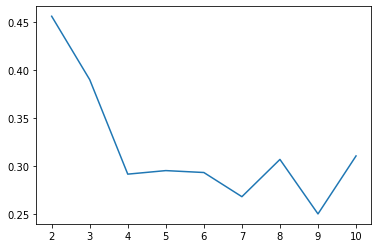

In [ ]:
import matplotlib.pyplot as plt
xpoints = np.array([2,3,4,5,6,7,8,9,10])
ypoints = silhouette_score
plt.plot(xpoints, ypoints)
plt.show()